In [3]:
import matplotlib
%matplotlib inline
import pylab as plt

In [139]:
filename = "../../../face_recog/unknown_people/kriti.jpg"

In [140]:
 %%bash --out output --err error -s "$filename"
face_recognition ../../../face_recog/known_people/ $1

In [141]:
print(output)

../../../face_recog/unknown_people/kriti.jpg,kriti



In [142]:
output1 = output.split('\n')
output1 =  filter(None, output1) 
names =  [x.split(',')[1] for x in output1] 
def unknown(x):
    if x== 'unknown_person':
        return '?'
    else: return x
names = map(lambda x: unknown(x),names)

In [143]:
names

['kriti']

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 726, Left: 1096, Bottom: 1281, Right: 1650


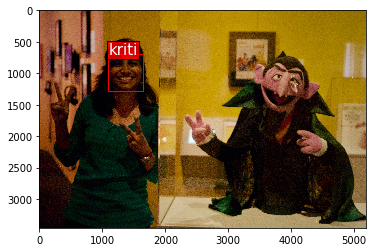

In [144]:
from PIL import Image
import face_recognition
import matplotlib.patches as patches
import numpy as np

im = np.array(Image.open(filename), dtype=np.uint8)
# Load the jpg file into a numpy array
image = face_recognition.load_image_file(filename)

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)
for i,face_location in enumerate(face_locations):
    
    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
#     pil_image.show()
    rect = patches.Rectangle((left,top-25),right-left,bottom-(top-25),linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(left, top-25 , names[i], fontsize=15,bbox={'facecolor':'red', 'alpha':0.8, 'pad':1},color='white')

plt.show()